# 从零实现线性神经元二分类器

In [10]:
import numpy as np  
from collections import defaultdict
import matplotlib.pyplot as plt

&emsp;&emsp;本文主要旨在从零对算法进行实现，因此对算法原理的阐述将保持简洁。接下来，我们将概述感知机和逻辑斯蒂回归（Logistic Regression）的基本原理，并提供从零实现这两种算法的示例。此外，我们还将通过启发式方法探讨它们在实际应用中的局限性。

## 感知机

### 算法原理  

感知机（Perceptron）是一种基础的线性分类模型，最早由弗兰克·罗森布拉特 (Frank Rosenblatt) 在1958年提出。其主要原理如下：  

#### 1. 模型结构  
感知机由输入节点、权重、偏置和激活函数组成：  
- **输入节点**：接收输入特征的值。  
- **权重**：每个输入特征都有一个对应的权重，用于衡量特征的重要性。  
- **偏置**：一个常数项，使模型能够更灵活地拟合数据。  
- **激活函数**：通常是阶跃函数，将加权和转换为输出（0或1）。  

#### 2. 工作流程  
1. **加权求和**：计算输入特征与对应权重的加权和：  
   $$
   z = \sum_{i=1}^{n} w_i x_i + b  
   $$  
   其中，$w_i$ 是权重，$x_i$ 是输入特征，$b$ 是偏置。  

2. **应用激活函数**：将加权和 \(z\) 输入到激活函数中，决定输出类别：  
   $$
   y = f(z)  
   $$  
   典型的激活函数为阶跃函数：  
   $$  
   f(z) =   
   \begin{cases}   
   1 & \text{if } z \geq 0 \\   
   0 & \text{if } z < 0   
   \end{cases}  
   $$  

#### 3. 训练过程  
感知机使用迭代方法进行训练，主要包括以下步骤：  
- **初始化权重和偏置**：通常设置为小随机值。  
- **更新规则**：根据预测错误来调整权重和偏置：  
  $$
  w_i \leftarrow w_i + \eta (y_{\text{true}} - y_{\text{pred}}) x_i  
  $$  
  $$  
  b \leftarrow b + \eta (y_{\text{true}} - y_{\text{pred}})  
  $$  
  其中，$\eta$ 是学习率，$y_{\text{true}}$ 是真实标签，$y_{\text{pred}}$ 是模型预测值。  

### 从零实现

In [ ]:
class Perceptron:  
    def __init__(self, learning_rate=0.01, n_iter=1000):  
        self.learning_rate = learning_rate  # 学习率  
        self.n_iter = n_iter  # 迭代次数  
        self.weights = None  # 权重初始化  
        self.bias = None  # 偏置初始化  

    def fit(self, X, y):  
        """  
        训练感知机模型  
        :param X: 输入特征数据，形状为 (n_samples, n_features)  
        :param y: 标签数据，形状为 (n_samples,)  
        """  
        n_samples, n_features = X.shape  
        self.weights = np.zeros(n_features)  # 初始化权重为零  
        self.bias = 0  # 初始化偏置为零  

        # 迭代更新权重  
        for _ in range(self.n_iter):  
            for idx, x_i in enumerate(X):  
                linear_output = np.dot(x_i, self.weights) + self.bias  # 计算加权和  
                y_predicted = self.activation_function(linear_output)  # 应用激活函数  

                # 更新规则  
                update = self.learning_rate * (y[idx] - y_predicted)  # 计算更新量  
                self.weights += update * x_i  # 更新权重  
                self.bias += update  # 更新偏置  

    def activation_function(self, x:np.ndarray):  
        """  
        激活函数  
        :param x: 输入值  
        :return: 二分类输出（0或1）  
        """  
        return (x >= 0).astype(int)  # 阶跃函数，返回0或1  

    def predict(self, X):  
        """  
        对新数据进行预测  
        :param X: 输入特征数据，形状为 (n_samples, n_features)  
        :return: 预测类别  
        """ 
        assert self.weights 
        assert self.bias 
        linear_output = np.dot(X, self.weights) + self.bias  # 计算加权和  
        y_predicted = self.activation_function(linear_output)  # 应用激活函数  
        return y_predicted  


### 启发性认识

下面我们分别构造一组二元分类的特征, 并基于不同类型的标签(与门、与非门、或门和异或门)进行学习

#### 数据构造

In [12]:
# 创建一个简单的二分类数据集  
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 输入特征  
y_and = np.array([0, 0, 0, 1])  # 与门的输出
y_nand = np.array([1, 1, 1, 0]) # 非与门
y_or = np.array([0, 1, 1, 1])   # 或门
y_xor = np.array([0, 1, 1, 0])  # 异或门

#### 进行训练和预测

In [13]:
res_dict = defaultdict(dict)
for y_type, y in zip(('AND', 'NAND', 'OR', 'XOR'), (y_and, y_nand, y_or, y_xor)):
    perceptron = Perceptron(learning_rate=0.1, n_iter=10)  # 初始化感知机  
    perceptron.fit(X, y)  # 训练感知机  
    predictions = perceptron.predict(X)  # 进行预测  
    save_res = res_dict[y_type]
    save_res['weights'] = perceptron.weights
    save_res['bias'] = perceptron.bias
    save_res['y_hat'] = predictions
    save_res['y'] = y
    save_res['X'] = X

#### 打印结果

In [14]:
for y_type, results in res_dict.items():  
    print(y_type)  
    print(f"{'y:':10}{results['y']}")  
    print(f"{'y_hat:':10}{results['y_hat']}")   
    print(f"{'weights:':10}{results['weights']}")  
    print(f"{'bias:':10}{results['bias']: .2f}")  
    print("=" * 40)  # 分隔线  

AND
y:        [0 0 0 1]
y_hat:    [0 0 0 1]
weights:  [0.2 0.1]
bias:     -0.20
NAND
y:        [1 1 1 0]
y_hat:    [1 1 1 0]
weights:  [-0.2 -0.1]
bias:      0.20
OR
y:        [0 1 1 1]
y_hat:    [0 1 1 1]
weights:  [0.1 0.1]
bias:     -0.10
XOR
y:        [0 1 1 0]
y_hat:    [1 1 0 0]
weights:  [-0.1  0. ]
bias:      0.00


> 可以看出, 除了XOR, 其它的都正确分类了

#### 可视化演示

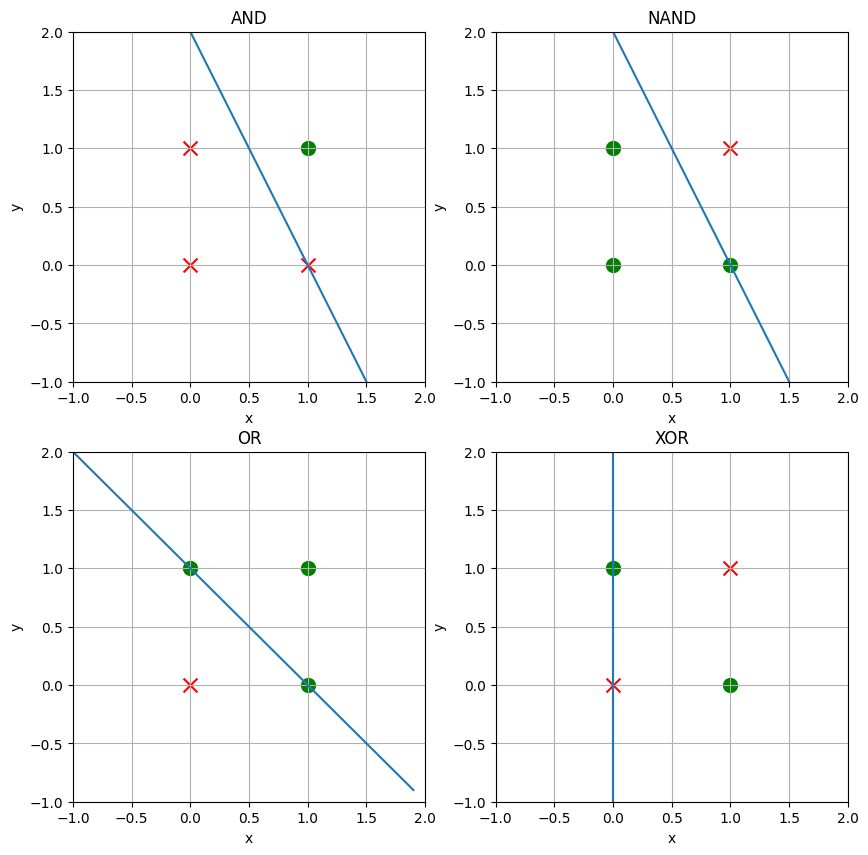

In [15]:
x = np.arange(-1, 2, 0.1)  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for ax, (k, v) in zip(axes, res_dict.items()):
    ax: plt.Axes
    y_line = (- v['weights'][0] / (v['weights'][1] + 1e-10)) * x -  v['bias'] / (v['weights'][1] + 1e-10)   # 1e-10 防止分母为0
    ax.scatter(*v['X'][v['y'] == 1].T, marker='o', c='green', s=100)
    ax.scatter(*v['X'][v['y'] == 0].T, marker='x', c='red', s=100)
    ax.plot(x, y_line)
    ax.set_title(k)
    ax.set_xlabel('x')  
    ax.set_ylabel('y')  
    ax.set_xlim(-1, 2)  # 设置 x 轴范围  
    ax.set_ylim(-1, 2)  
    ax.grid(True)  
plt.show()  

&emsp;&emsp;可以看出, 感知机算法可以实现与门, 但是异或门却无法线性可分。

## Logistic回归

### 算法原理

#### 1. 模型假设  

逻辑斯蒂回归的核心思想是通过逻辑函数来预测事件的概率。其主要步骤包括：  

- **线性组合**：与线性回归类似，逻辑斯蒂回归首先计算输入特征的线性组合，即：  
  $$  
  z = W^T x + b  
  $$  
  其中 $W$ 是权重向量，$x$ 是输入特征，$b$ 是偏置。  

#### 2. 激活函数  

- **Sigmoid 函数**：逻辑斯蒂回归使用sigmoid函数将线性组合的结果 $z$ 转换为一个介于 0 和 1 之间的概率值，公式为：  
  $$  
  P(y=1|x) = \frac{1}{1 + e^{-z}}  
  $$  
  这里 $P(y=1|x)$ 表示在给定特征 $x$ 的情况下，样本属于正类的概率。  

#### 3. 决策边界  

- **分类决策**：将得到的概率与一个阈值（通常是0.5）进行比较。如果概率大于 0.5，则判断为正类（例如1），否则为负类（例如0）。因此，逻辑斯蒂回归通过定义一个决策边界来进行分类。  

#### 4. 损失函数  

- **对数损失**：为了训练模型，逻辑斯蒂回归使用对数损失（log loss）作为损失函数，目标是最小化该损失。损失函数定义为：  
  $$  
  L(W, b) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(P(y^{(i)}=1|x^{(i)})) + (1 - y^{(i)}) \log(1 - P(y^{(i)}=1|x^{(i)})) \right)  
  $$  
  其中 $m$ 是样本总数，$y^{(i)}$ 是第 $i$ 个样本的真实标签。  

#### 5. 优化  

- **训练过程**：使用梯度下降法或其他优化算法（如拟牛顿法）来更新权重 $W$ 和偏置 $b$，直至找到最佳参数以最小化损失函数。  

### 从零实现

In [ ]:
class LogisticRegression:  
    def __init__(self, learning_rate=0.1, num_iterations=1000):  
        """  
        初始化逻辑斯蒂回归模型。  

        参数:  
        learning_rate: 学习率，用于梯度下降法。  
        num_iterations: 迭代次数。  
        """  
        self.learning_rate = learning_rate  
        self.num_iterations = num_iterations
        self.weights = None  
        self.bias = None  

    def sigmoid(self, z):    
        return 1 / (1 + np.exp(-z))  

    def fit(self, X, y):  
        """  
        训练模型，拟合权重和偏置。  

        参数:  
        X: 输入特征，形状为(n_samples, n_features)的数组。  
        y: 标签，形状为(n_samples,)的数组。  
        """  
        num_samples, num_features = X.shape  
        self.weights = np.zeros(num_features)  # 初始化权重为零  
        self.bias = 0  # 初始化偏置为零  
        for _ in range(self.num_iterations):  
            linear_model = np.dot(X, self.weights) + self.bias  
            y_predicted = self.sigmoid(linear_model)  
            # 计算梯度  
            dw = (1 / num_samples) * (y_predicted - y) @ X
            db = (1 / num_samples) * np.sum(y_predicted - y)  
            # 更新权重和偏置  
            self.weights -= self.learning_rate * dw  
            self.bias -= self.learning_rate * db  

    def predict(self, X):  
        assert self.weights 
        assert self.bias
        linear_model = np.dot(X, self.weights) + self.bias  
        y_predicted = self.sigmoid(linear_model)  
        return [1 if i > 0.5 else 0 for i in y_predicted]

### 启发性认识

下面我们继续使用之前的数据进行学习

#### 采用梯度下降进行迭代训练

In [ ]:
logistic_res_dict = defaultdict(dict)
for y_type, y in zip(('AND', 'NAND', 'OR', 'XOR'), (y_and, y_nand, y_or, y_xor)):
    model_gd = LogisticRegression(learning_rate=0.1, num_iterations=1000)  # 采用梯度下降  
    model_gd.fit(X, y)  # 训练
    predictions = model_gd.predict(X)  # 进行预测  
    save_res = logistic_res_dict[y_type]
    save_res['weights'] = perceptron.weights
    save_res['bias'] = perceptron.bias
    save_res['y_hat'] = predictions
    save_res['y'] = y
    save_res['X'] = X

#### 打印结果并可视化演示

AND
y:        [0 0 0 1]
y_hat:    [0, 0, 0, 1]
weights:  [-0.1  0. ]
bias:      0.00
NAND
y:        [1 1 1 0]
y_hat:    [1, 1, 1, 0]
weights:  [-0.1  0. ]
bias:      0.00
OR
y:        [0 1 1 1]
y_hat:    [0, 1, 1, 1]
weights:  [-0.1  0. ]
bias:      0.00
XOR
y:        [0 1 1 0]
y_hat:    [0, 0, 0, 0]
weights:  [-0.1  0. ]
bias:      0.00


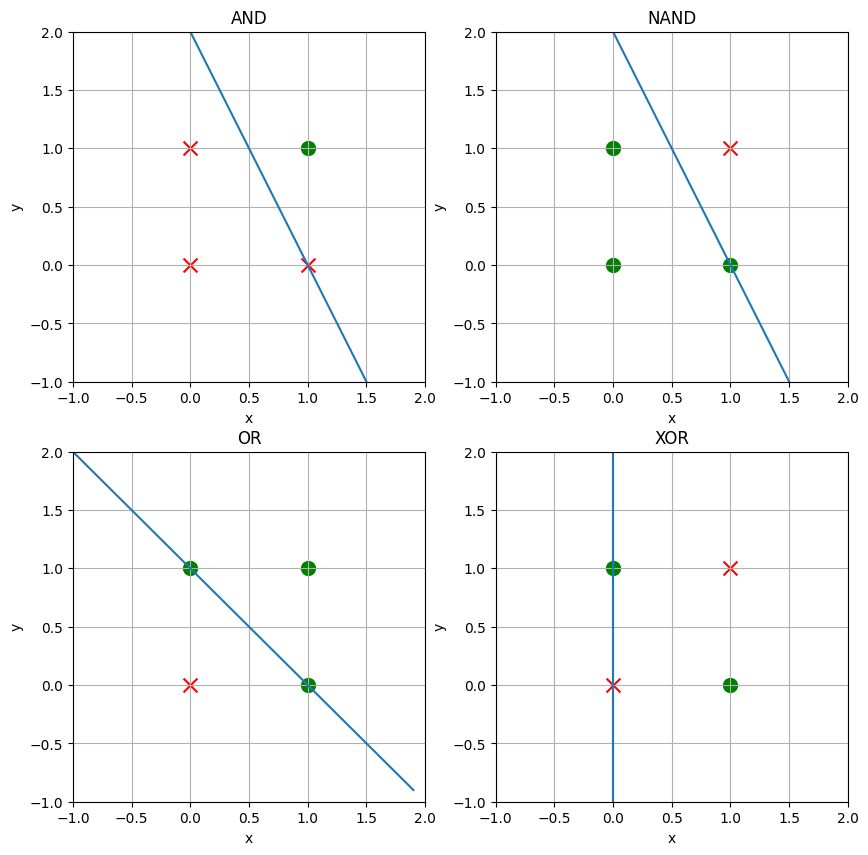

In [18]:
for y_type, results in logistic_res_dict.items():  
    print(y_type)  
    print(f"{'y:':10}{results['y']}")  
    print(f"{'y_hat:':10}{results['y_hat']}")   
    print(f"{'weights:':10}{results['weights']}")  
    print(f"{'bias:':10}{results['bias']: .2f}")  
    print("=" * 40)  # 分隔线  
x = np.arange(-1, 2, 0.1)  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for ax, (k, v) in zip(axes, res_dict.items()):
    ax: plt.Axes
    y_line = (- v['weights'][0] / (v['weights'][1] + 1e-10)) * x -  v['bias'] / (v['weights'][1] + 1e-10)   # 1e-10 防止分母为0
    ax.scatter(*v['X'][v['y'] == 1].T, marker='o', c='green', s=100)
    ax.scatter(*v['X'][v['y'] == 0].T, marker='x', c='red', s=100)
    ax.plot(x, y_line)
    ax.set_title(k)
    ax.set_xlabel('x')  
    ax.set_ylabel('y')  
    ax.set_xlim(-1, 2)  # 设置 x 轴范围  
    ax.set_ylim(-1, 2)  
    ax.grid(True)  
plt.show()  

&emsp;&emsp; 显然, 同样的结果

## 总结

&emsp;&emsp;相信很多朋友发现, 感知机模型和逻辑斯蒂回归这两者在结构上挺像的，都可以看作是单个神经元的模型，但它们使用了不同的激活函数。

&emsp;&emsp;首先，感知机一般使用阶跃函数，这种函数的特点是，当输入大于某个值时，输出就是1；否则就是0。而逻辑斯蒂回归则使用的是sigmoid函数，它把输出压缩到0到1之间，非常适合做概率预测。

&emsp;&emsp;在损失函数方面, 感知机采用的是铰链损失，这种损失关注的是分类错误的样本。而逻辑斯蒂回归使用的是对数损失。这种损失的目标是最大化似然函数，换句话说，就是让模型尽量准确地预测出每个样本的概率。

&emsp;&emsp;在优化方面，感知机有自己的一套学习算法，它通过不断的迭代来更新权重，直到所有训练样本都被正确分类，或者满足了某些迭代条件。而逻辑斯蒂回归通常会采用梯度下降法或者拟牛顿法这样的优化方法，反复调整权重，力求找到最好的参数组合，最小化损失函数。

&emsp;&emsp; 感知机模型和逻辑斯蒂回归通常解决的是二分类问题, 那么对于多分类问题呢? 通常我们采用的是逻辑斯蒂回归的扩展版: SoftMax回归, 它采用了单层的多个神经元, 并加入了softmax层将每个神经元最后的输出转化为对应每个分类的概率。下期将为大家从零实现softmax回归。